In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

/home/hnsiah/miniforge/envs/CLIM/lib/python3.12/site-packages/pyproj/__init__.py:95: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [33]:
file_nino34='/home/pdirmeye/classes/clim680_2022/nino34_1982-2019.oisstv2_anoms.nc'
ds_nino34=xr.open_dataset(file_nino34)

In [24]:
time = ds_nino34['time']
nino34 = ds_nino34['sst']
ds_nino34_sliced = nino34[(time.dt.year >= 1985) & (time.dt.year < 2015)]
new_time =  time[(time.dt.year >= 1985) & (time.dt.year < 2015)]
# ds_nino34_sliced

In [12]:
elnino=ds_nino34_sliced.where(ds_nino34_sliced>=1)
lanina=ds_nino34_sliced.where(ds_nino34_sliced<=-1)
neutral=ds_nino34_sliced.where(np.logical_and(ds_nino34_sliced>-1,
                                              ds_nino34_sliced<1))

In [13]:
print('El Nino: ',elnino.count(dim='time').values)
print('Neutral: ',neutral.count(dim='time').values)
print('La Nina: ',lanina.count(dim='time').values)

counts=[elnino.count(dim='time').values,
        lanina.count(dim='time').values,
        neutral.count(dim='time').values]
print(counts)

El Nino:  40
Neutral:  259
La Nina:  61
[array(40), array(61), array(259)]


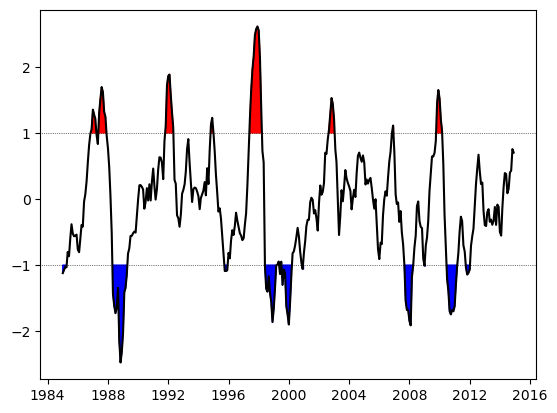

In [14]:
plt.plot(ds_nino34_sliced['time'],ds_nino34_sliced,'k')
plt.fill_between(ds_nino34_sliced['time'],1,elnino,color='red')
plt.fill_between(ds_nino34_sliced['time'],lanina, -1,color='blue')
plt.axhline(1,color='black',linewidth=0.5,linestyle='dotted')
plt.axhline(-1,color='black',linewidth=0.5,linestyle='dotted')

In [80]:
file_path = '/home/lortizur/clim680/project_data/'
file_name = 'tasmax.gfdl-esm4.1985-2014.nc'
ds = xr.open_dataset(file_path+file_name)


In [67]:
ds_new = ds.assign_coords(time=new_time)
ds_clim=ds_new.groupby('time.month').mean()
ds_anomaly=ds_new.groupby('time.month')- ds_clim


In [68]:
elnino_temp=np.squeeze(ds_anomaly.sel(time=elnino.dropna(dim='time')['time']).mean(dim='time'))
lanina_temp=np.squeeze(ds_anomaly.sel(time=lanina.dropna(dim='time')['time']).mean(dim='time'))
neutral_temp=np.squeeze(ds_anomaly.sel(time=neutral.dropna(dim='time')['time']).mean(dim='time'))
temp =[elnino_precip,lanina_precip,neutral_precip]

Text(0.5, 0.98, 'Composite Temperature Anomalies during ENSO')

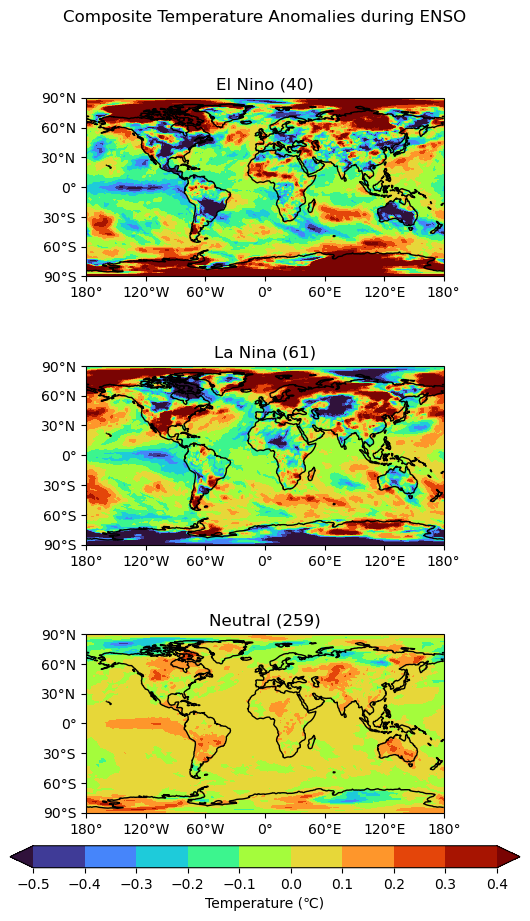

In [93]:
labels=['El Nino','La Nina', 'Neutral']
clevs=np.arange(-0.5,0.5,0.1)

# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=3,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(8.5,11))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i,enso in enumerate(comp_precip):

        # Select the season
        data=comp_precip[i]['tasmax'] #-273.15

        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=comp_precip[i]['lon'])

        # Contour plot
        cs=axs[i].contourf(lons,comp_precip[i]['lat'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='turbo',extend='both')

       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        
        # Title each subplot with the name of the season
        axs[i].set_title(labels[i]+' ('+str(counts[i])+')')

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='Temperature (℃)')

# Add a big title at the top
plt.suptitle('Composite Temperature Anomalies during ENSO')

Text(0.5, 0.98, 'Composite Temperature Differences during ENSO')

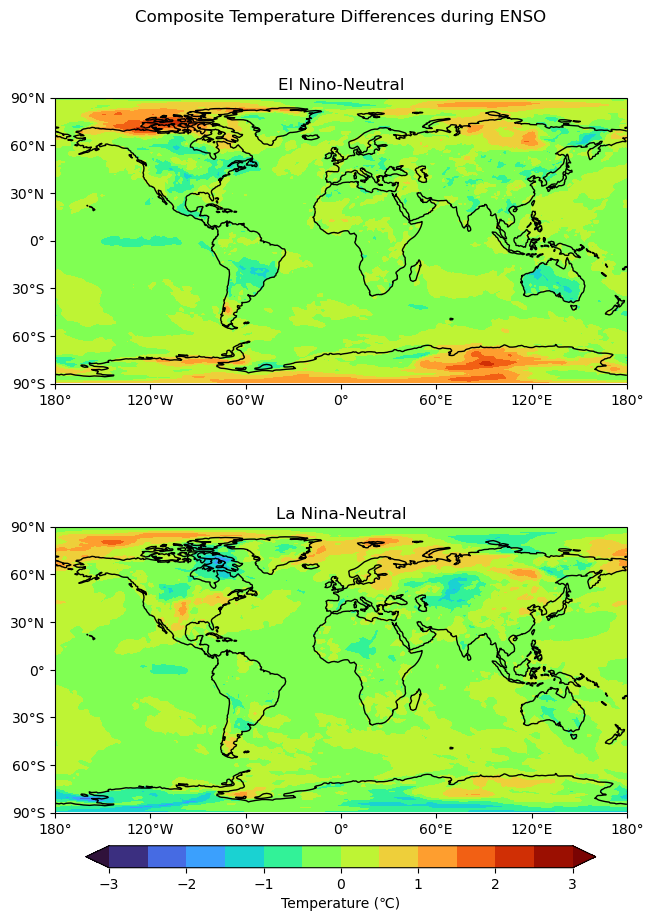

In [128]:
diff_temp=[elnino_temp-neutral_temp, 
             lanina_temp-neutral_temp]

labels=['El Nino-Neutral','La Nina-Neutral']
clevs=np.arange(-3,3.5,0.5)

# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=2,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(8.5,11))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i,enso in enumerate(diff_temp):

        # Select the season
        data=diff_temp[i]['tasmax']

        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=diff_temp[i]['lon'])

        # Contour plot
        cs=axs[i].contourf(lons,diff_temp[i]['lat'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='turbo',extend='both')

       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        
        # Title each subplot with the name of the season
        axs[i].set_title(labels[i])

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)
# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='Temperature (℃)')

# Add a big title at the top
plt.suptitle('Composite Temperature Differences during ENSO')

In [127]:
p=0.5

from scipy.stats import ttest_ind

elnino_temp_vals=np.squeeze(ds_anomaly.sel(time=elnino.dropna(dim='time')['time']))
lanina_temp_vals=np.squeeze(ds_anomaly.sel(time=lanina.dropna(dim='time')['time']))
neutral_temp_vals=np.squeeze(ds_anomaly.sel(time=neutral.dropna(dim='time')['time']))

tstat,pval=ttest_ind(elnino_temp_vals['tasmax'], 
                neutral_temp_vals['tasmax'], 
                equal_var = False)

In [116]:
mask_diff=diff_temp[0]['tasmax'].where(pval<p)


Text(0.5, 0.98, 'Composite Temperature Differences El Nino-Neutral')

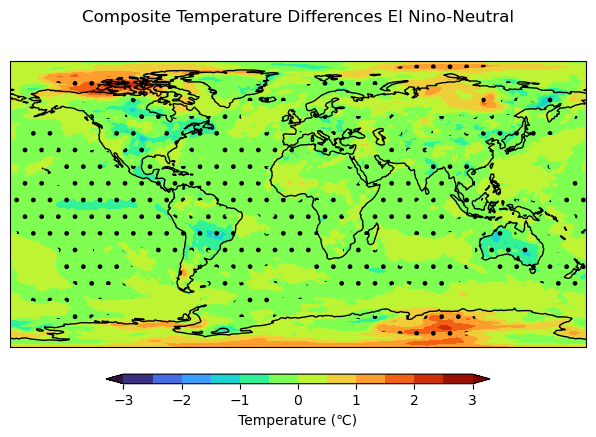

In [120]:
labels=['El Nino-Neutral']
clevs=np.arange(-3,3.5,0.5)
hatch_levs=[0]

# Define the figure and each axis for the 2 rows and 1 columns
fig, axs = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()})


data=diff_temp[0]['tasmax']

# Add the cyclic point
data,lons=add_cyclic_point(data,coord=diff_temp[0]['lon'])
mask_data,lons=add_cyclic_point(mask_diff,coord=diff_temp[0]['lon'])

# Contour plot
cs=axs.contourf(lons,diff_temp[0]['lat'],data,clevs,
                    transform = ccrs.PlateCarree(),
                    cmap='turbo',extend='both')

axs.contourf(lons,diff_temp[0]['lat'],mask_data,[0,1],
              transform = ccrs.PlateCarree(),colors='None',
             hatches=['.',''],extend='both',alpha=0)

# Draw the coastines for each subplot
axs.coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='Temperature (℃)')

# Add a big title at the top
plt.suptitle('Composite Temperature Differences El Nino-Neutral')

In [129]:
tstat,pval=ttest_ind(lanina_temp_vals['tasmax'], 
                neutral_temp_vals['tasmax'], 
                equal_var = False)

mask_diff=diff_temp[0]['tasmax'].where(pval<p)


Text(0.5, 0.98, 'Composite Temperature Differences La Nina-Neutral')

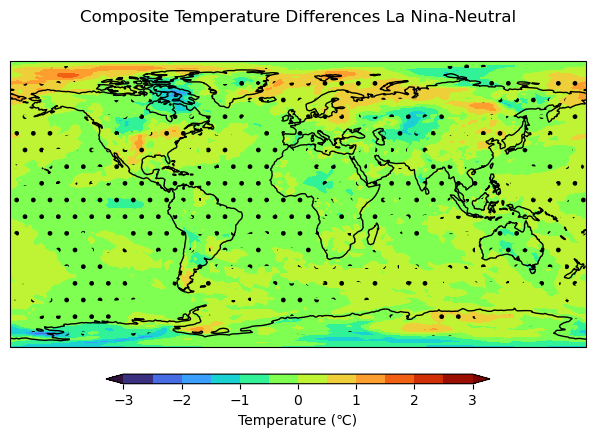

In [130]:
labels=['La Nina-Neutral']
clevs=np.arange(-3,3.5,0.5)
hatch_levs=[0]

# Define the figure and each axis for the 2 rows and 1 columns
fig, axs = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()})


data=diff_temp[1]['tasmax']

# Add the cyclic point
data,lons=add_cyclic_point(data,coord=diff_temp[0]['lon'])
mask_data,lons=add_cyclic_point(mask_diff,coord=diff_temp[0]['lon'])

# Contour plot
cs=axs.contourf(lons,diff_temp[0]['lat'],data,clevs,
                    transform = ccrs.PlateCarree(),
                    cmap='turbo',extend='both')

axs.contourf(lons,diff_temp[0]['lat'],mask_data,[0,1],
              transform = ccrs.PlateCarree(),colors='None',
             hatches=['.',''],extend='both',alpha=0)

# Draw the coastines for each subplot
axs.coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='Temperature (℃)')

# Add a big title at the top
plt.suptitle('Composite Temperature Differences La Nina-Neutral')